In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as stats
import itertools as it
import math 
import pandas as pd

In [5]:
##define the fixed parameters
hatchability = 0.98  #if hatchability is density (egg or adult) depedent, then define it in the pre-adult-module or the adult-module functions 
x1 = 2.5  #parameter in finding the mean larval size
x2 = 1  #parameter in finding the mean larval size 
x3 = 0.009 #parameter in finding the mean larval size 
sigma_size = 0.45  #parameter in assigning larval sizes by drawing from a normal distribution
mc = 1.1 #critical size cut off of the larval stage for successful pupation (= 1.1 (JB) and 1 (FEJ))
x4 = 1.0  #parameter in finding the adult sizes
female_proportion = 0.5 #assign sex to the adutls 
x5 = 85 #parameter in finding fecundity
x6 = 2  #parameter in finding fecundity
sen_adsize = 1.7 #parameter related to sensivity of fecundity to adult size
sen_adden = 0.17 #parameter related to sensivity of fecundity to adult denisity
f = 0#migration rate

C:\Users\HP\AppData\Local\Temp\ipykernel_8472\2271222072.py:26: RuntimeWarning: invalid value encountered in scalar divide
  survivorship = average_number_of_adults/numegg


[0.         0.79       0.887      0.922      0.939      0.9456
 0.953      0.95371429 0.9555     0.95244444 0.9544     0.93690909
 0.93616667 0.93492308 0.93314286 0.93533333 0.932375   0.92635294
 0.92055556 0.92147368 0.9128     0.9        0.891      0.88869565
 0.87541667 0.86984    0.85984615 0.84748148 0.83778571 0.82165517
 0.8096     0.78690323 0.767      0.75927273 0.74252941 0.72428571
 0.70283333 0.67805405 0.65847368 0.63410256]
0.8570782268309722


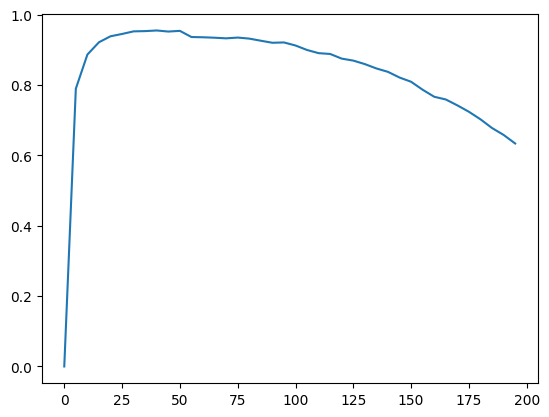

In [6]:
#I will just see the realation the surviorship with different number of larave and adults

##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 

food = 1.76

def Pre_Adult_Module(numegg,food):
    
    numlarva = int(hatchability*numegg)
    mean_size = x1*(1-1/(x2+np.exp(-x3*numlarva+food)))
    size_larva_arr = abs(np.random.normal(mean_size, sigma_size, numlarva))
    numadult = (size_larva_arr>=mc).sum()
    if np.isnan(numadult):
        numadult = 0
    # size_adult_arr = x4*size_larva_arr[size_larva_arr>=mc]
    return numadult


def average_survivorship(numegg,food):

    adult_number = 0
    for i in range(0, 100):
        adult_number = adult_number + Pre_Adult_Module(numegg,food)
    average_number_of_adults = adult_number/100
    survivorship = average_number_of_adults/numegg
    return survivorship


number_of_eggs = np.arange(0, 200, 5)
survivorship_for_egg_number = []

for numegg in number_of_eggs:
    survivorship_for_egg_number.append(average_survivorship(numegg,food))

survivorship_for_egg_number = np.nan_to_num(survivorship_for_egg_number)

plt.plot(number_of_eggs, survivorship_for_egg_number)


print(survivorship_for_egg_number)
print(np.mean(survivorship_for_egg_number)/0.98)


Change the code such that it gives the number of adults vs number of eggs?

Or, Do a 2nd order degree polynomial to estimate a function that gives the number of eggs with
Then find the solution of the polynomia with +ve root to generate a cirve